In [17]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from keras.callbacks import LearningRateScheduler
from sklearn.utils.class_weight import compute_class_weight
from keras.callbacks import TensorBoard
from sklearn.metrics import confusion_matrix, classification_report


In [18]:
picture_size = 48
train_path='/kaggle/input/emotions-recognition-super-dataset/combined/train'
test_path='/kaggle/input/emotions-recognition-super-dataset/combined/test'

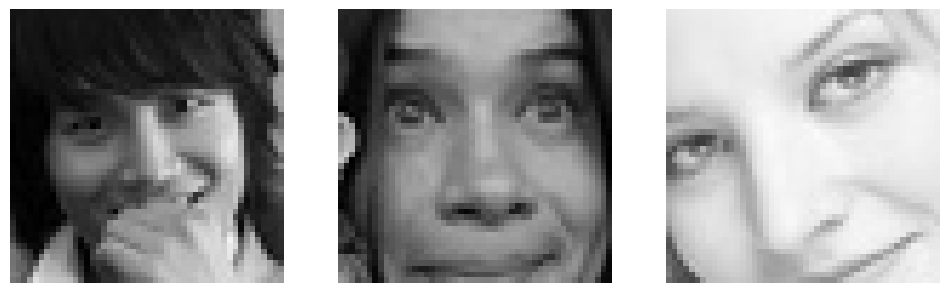

In [19]:
import random
expression = 'happy'

images = os.listdir(os.path.join(train_path, expression))

random_images = random.sample(images, 3)

plt.figure(figsize=(12, 4))
for i, image in enumerate(random_images):
    plt.subplot(1, 3, i + 1)
    img = load_img(os.path.join(train_path, expression, image), target_size=(picture_size, picture_size))
    plt.imshow(img)
    plt.axis('off')  
plt.show()


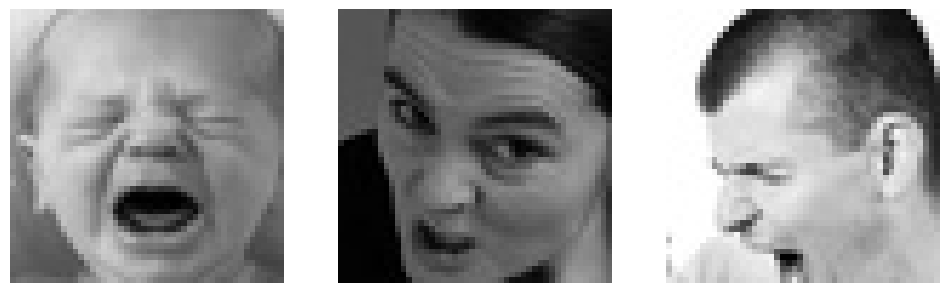

In [20]:
import random
expression = 'angry'

images = os.listdir(os.path.join(train_path, expression))

random_images = random.sample(images, 3)

plt.figure(figsize=(12, 4))
for i, image in enumerate(random_images):
    plt.subplot(1, 3, i + 1)
    img = load_img(os.path.join(train_path, expression, image), target_size=(picture_size, picture_size))
    plt.imshow(img)
    plt.axis('off')  
plt.show()


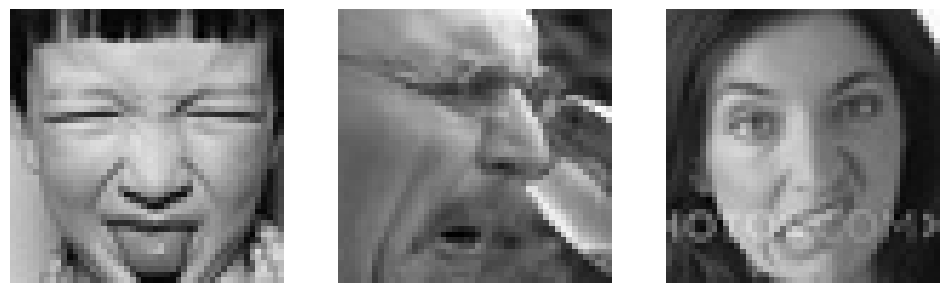

In [21]:
import random
expression = 'disgust'

images = os.listdir(os.path.join(train_path, expression))

random_images = random.sample(images, 3)

plt.figure(figsize=(12, 4))
for i, image in enumerate(random_images):
    plt.subplot(1, 3, i + 1)
    img = load_img(os.path.join(train_path, expression, image), target_size=(picture_size, picture_size))
    plt.imshow(img)
    plt.axis('off')  
plt.show()


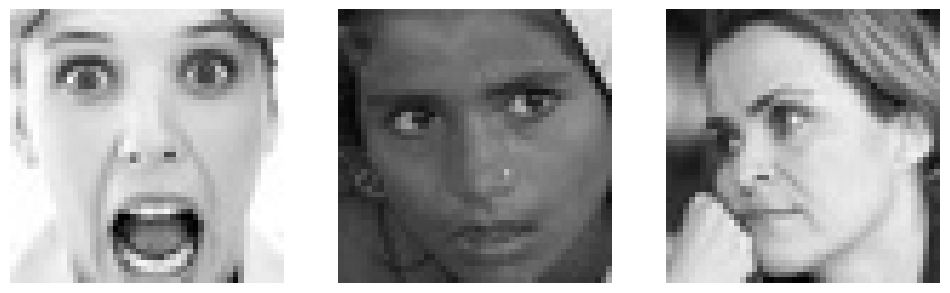

In [22]:
import random
expression = 'fear'

images = os.listdir(os.path.join(train_path, expression))

random_images = random.sample(images, 3)

plt.figure(figsize=(12, 4))
for i, image in enumerate(random_images):
    plt.subplot(1, 3, i + 1)
    img = load_img(os.path.join(train_path, expression, image), target_size=(picture_size, picture_size))
    plt.imshow(img)
    plt.axis('off')  
plt.show()


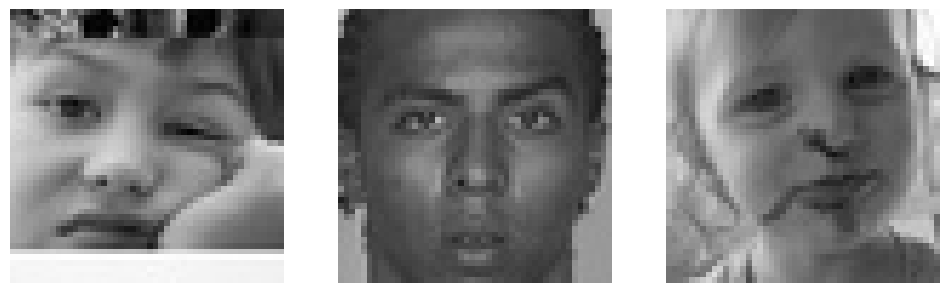

In [23]:
import random
expression = 'neutral'

images = os.listdir(os.path.join(train_path, expression))

random_images = random.sample(images, 3)

plt.figure(figsize=(12, 4))
for i, image in enumerate(random_images):
    plt.subplot(1, 3, i + 1)
    img = load_img(os.path.join(train_path, expression, image), target_size=(picture_size, picture_size))
    plt.imshow(img)
    plt.axis('off')  
plt.show()


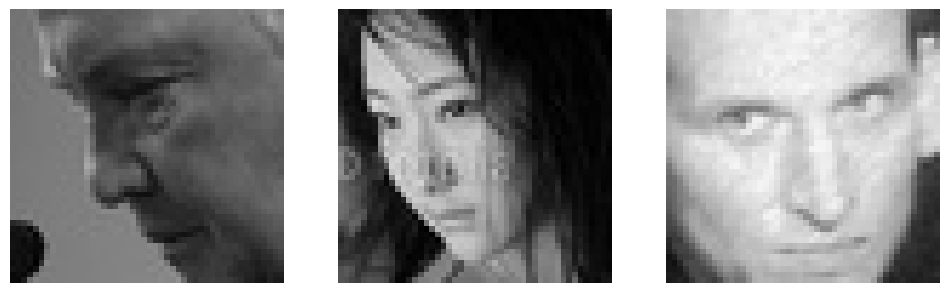

In [24]:
import random
expression = 'sad'

images = os.listdir(os.path.join(train_path, expression))

random_images = random.sample(images, 3)

plt.figure(figsize=(12, 4))
for i, image in enumerate(random_images):
    plt.subplot(1, 3, i + 1)
    img = load_img(os.path.join(train_path, expression, image), target_size=(picture_size, picture_size))
    plt.imshow(img)
    plt.axis('off')  
plt.show()


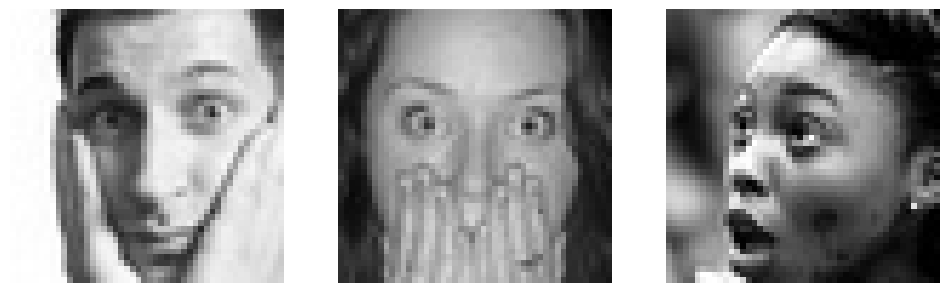

In [25]:
import random
expression = 'surprise'

images = os.listdir(os.path.join(train_path, expression))

random_images = random.sample(images, 3)

plt.figure(figsize=(12, 4))
for i, image in enumerate(random_images):
    plt.subplot(1, 3, i + 1)
    img = load_img(os.path.join(train_path, expression, image), target_size=(picture_size, picture_size))
    plt.imshow(img)
    plt.axis('off')  
plt.show()


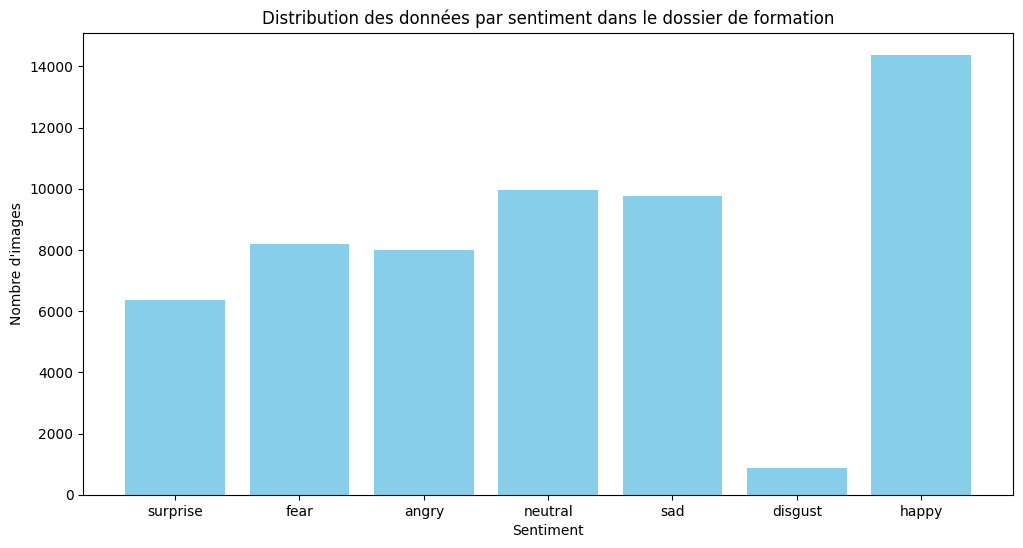

In [26]:
sentiments = os.listdir(train_path)

sentiment_count = {}

for sentiment in sentiments:
    images = os.listdir(os.path.join(train_path, sentiment))
    sentiment_count[sentiment] = len(images)

# Afficher la distribution sous forme de graphique à barres
plt.figure(figsize=(12, 6))
plt.bar(sentiment_count.keys(), sentiment_count.values(), color='skyblue')
plt.xlabel('Sentiment')
plt.ylabel('Nombre d\'images')
plt.title('Distribution des données par sentiment dans le dossier de formation')
plt.show()


In [27]:
train_image_count = sum(len(files) for _, _, files in os.walk(train_path))
test_image_count = sum(len(files) for _, _, files in os.walk(test_path))
print(f"Nombre d'images dans l'ensemble d'entraînement : {train_image_count}")
print(f"Nombre d'images dans l'ensemble de test : {test_image_count}")


Nombre d'images dans l'ensemble d'entraînement : 57530
Nombre d'images dans l'ensemble de test : 14244


In [28]:
from keras.preprocessing.image import ImageDataGenerator
import os

picture_size = (48,48)  
batch_size = 128

datagen_train = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(
    train_path,
    target_size=picture_size,
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True
)

test_set = datagen_val.flow_from_directory(
    test_path,
    target_size=picture_size,
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)


Found 57530 images belonging to 7 classes.
Found 14244 images belonging to 7 classes.


In [29]:
no_of_classes = 7

class_labels = train_set.classes
classes = np.unique(class_labels)
class_weights = compute_class_weight('balanced', classes=classes, y=class_labels)
class_weight_dict = dict(enumerate(class_weights))

model = Sequential()

# 1st CNN layer
model.add(Conv2D(64, (3, 3), padding="same", input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd CNN layer
model.add(Conv2D(128, (5, 5), padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd CNN layer
model.add(Conv2D(512, (3, 3), padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th CNN layer
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 5th CNN layer
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

# Fully connected 1st layer with L2 regularization
model.add(Dense(256, kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))  # Increase dropout rate

# Fully connected layer 2nd layer with L2 regularization
model.add(Dense(512, kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))  # Increase dropout rate

# Fully connected layer 3rd layer with L2 regularization
model.add(Dense(512, kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))  # Increase dropout rate

model.add(Dense(no_of_classes, activation="softmax"))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_8 (Bat  (None, 48, 48, 64)        256       
 chNormalization)                                                
                                                                 
 activation_8 (Activation)   (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 24, 24, 64)        0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 24, 24, 128)      

In [30]:
checkpoint = ModelCheckpoint("./face_emotion_model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=10,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=5,
                              verbose=1,
                              min_delta=0.001)

# Learning Rate Warm-up
warmup_epochs = 20
initial_lr = 0.001
final_lr = 0.01

def lr_scheduler(epoch, lr):
    if epoch < warmup_epochs:
        lr = initial_lr + epoch * ((final_lr - initial_lr) / warmup_epochs)
    return lr

scheduler = LearningRateScheduler(lr_scheduler)
tensorboard = TensorBoard(log_dir='./logs', histogram_freq=0, batch_size=batch_size, write_graph=True, write_grads=False, write_images=False)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate, scheduler, tensorboard]

epochs = 200

model.compile(loss='categorical_crossentropy',
              optimizer = RMSprop(lr=initial_lr),
              metrics=['accuracy'])


In [31]:

history = model.fit(train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                class_weight=class_weight_dict,
                                callbacks=callbacks_list
                                )


Epoch 1/200


2024-01-27 19:33:19.183415: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout_8/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


449/449 [==============================] - 63s 126ms/step - loss: 3.0643 - accuracy: 0.1597 - val_loss: 2.5189 - val_accuracy: 0.2349 - lr: 0.0010
Epoch 2/200
449/449 [==============================] - 56s 126ms/step - loss: 2.1677 - accuracy: 0.2548 - val_loss: 2.1829 - val_accuracy: 0.2289 - lr: 0.0014
Epoch 3/200
449/449 [==============================] - 56s 125ms/step - loss: 1.8248 - accuracy: 0.3442 - val_loss: 2.1963 - val_accuracy: 0.1757 - lr: 0.0019
Epoch 4/200
449/449 [==============================] - 59s 131ms/step - loss: 1.7269 - accuracy: 0.3920 - val_loss: 1.6191 - val_accuracy: 0.4398 - lr: 0.0023
Epoch 5/200
449/449 [==============================] - 58s 129ms/step - loss: 1.7015 - accuracy: 0.4255 - val_loss: 1.6352 - val_accuracy: 0.4407 - lr: 0.0028
Epoch 6/200
449/449 [==============================] - 57s 127ms/step - loss: 1.6654 - accuracy: 0.4469 - val_loss: 1.8656 - val_accuracy: 0.3281 - lr: 0.0033
Epoch 7/200
449/449 [==============================] - 57s

In [32]:
# Generate predictions for the test set
predictions = model.predict(test_set)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Convert true labels to class labels
true_labels = test_set.classes

# Get class names
class_names = list(test_set.class_indices.keys())

# Print classification report
print("Classification Report:\n", classification_report(true_labels, predicted_labels, target_names=class_names))


112/112 [==============================] - 12s 109ms/step
Classification Report:
               precision    recall  f1-score   support

       angry       0.92      0.90      0.91      1918
     disgust       0.94      0.94      0.94       222
        fear       0.93      0.89      0.91      2042
       happy       0.96      0.97      0.97      3599
     neutral       0.92      0.92      0.92      2449
         sad       0.88      0.91      0.90      2386
    surprise       0.95      0.96      0.96      1628

    accuracy                           0.93     14244
   macro avg       0.93      0.93      0.93     14244
weighted avg       0.93      0.93      0.93     14244



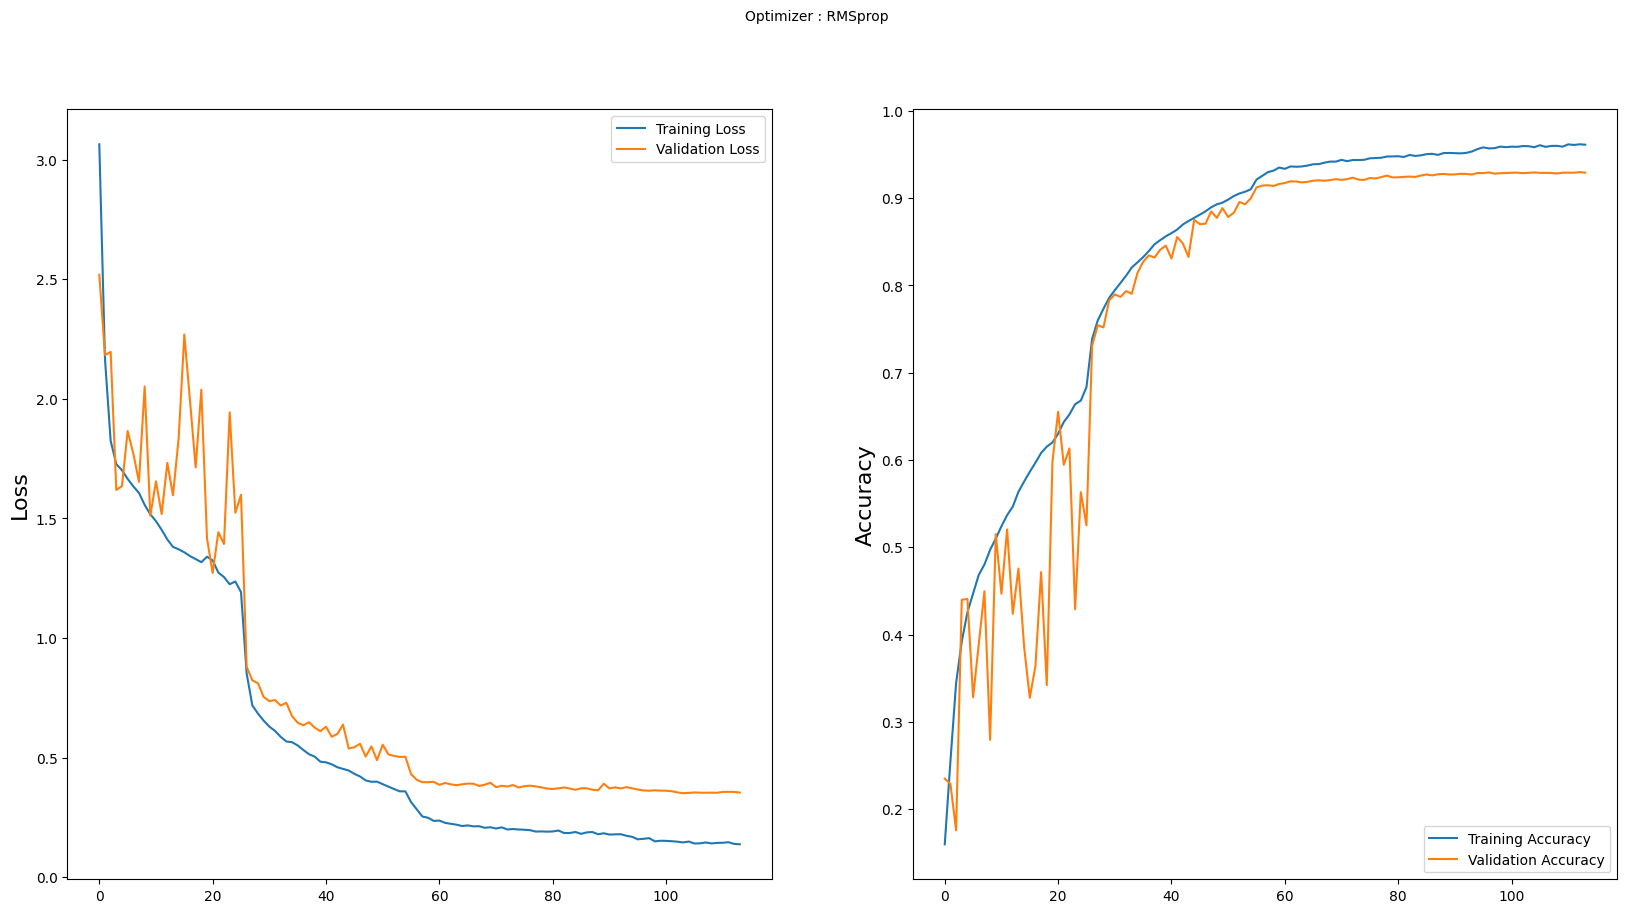

In [33]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : RMSprop', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()


112/112 [==============================] - 11s 102ms/step


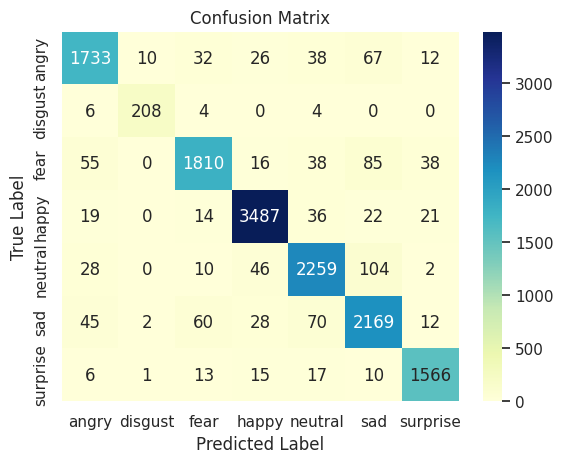

In [34]:
# Get the true labels and predicted labels for the validation set
validation_labels = test_set.classes
validation_pred_probs = model.predict(test_set)
validation_pred_labels = np.argmax(validation_pred_probs, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(validation_labels, validation_pred_labels)
class_names = list(train_set.class_indices.keys())
sns.set()
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='YlGnBu', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()




In [35]:
test_loss, test_accuracy = model.evaluate(test_set, steps=test_set.n // test_set.batch_size)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')


111/111 [==============================] - 12s 105ms/step - loss: 0.3512 - accuracy: 0.9288
Test Loss: 0.3512
Test Accuracy: 0.9288


In [36]:
model.save_weights('face_emotion_model.h5')


In [1]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)


NameError: name 'model' is not defined